<a href="https://colab.research.google.com/github/RtjShreyD/CV-DL/blob/master/Extreme_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

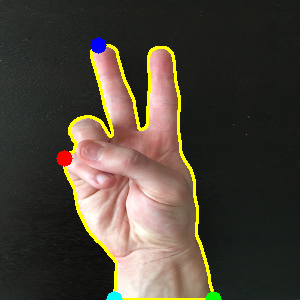

-1

In [17]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("hand_03.png")
image = cv2.resize(image, (300, 300))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
 
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
 
# show the output image
cv2_imshow( image)
cv2.waitKey(0)